In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\salman\OneDrive\Desktop\SEM 6\ML\datasets\transform\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slp,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slp,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\salman\AppData\Local\Temp\ipykernel_24380\111277950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


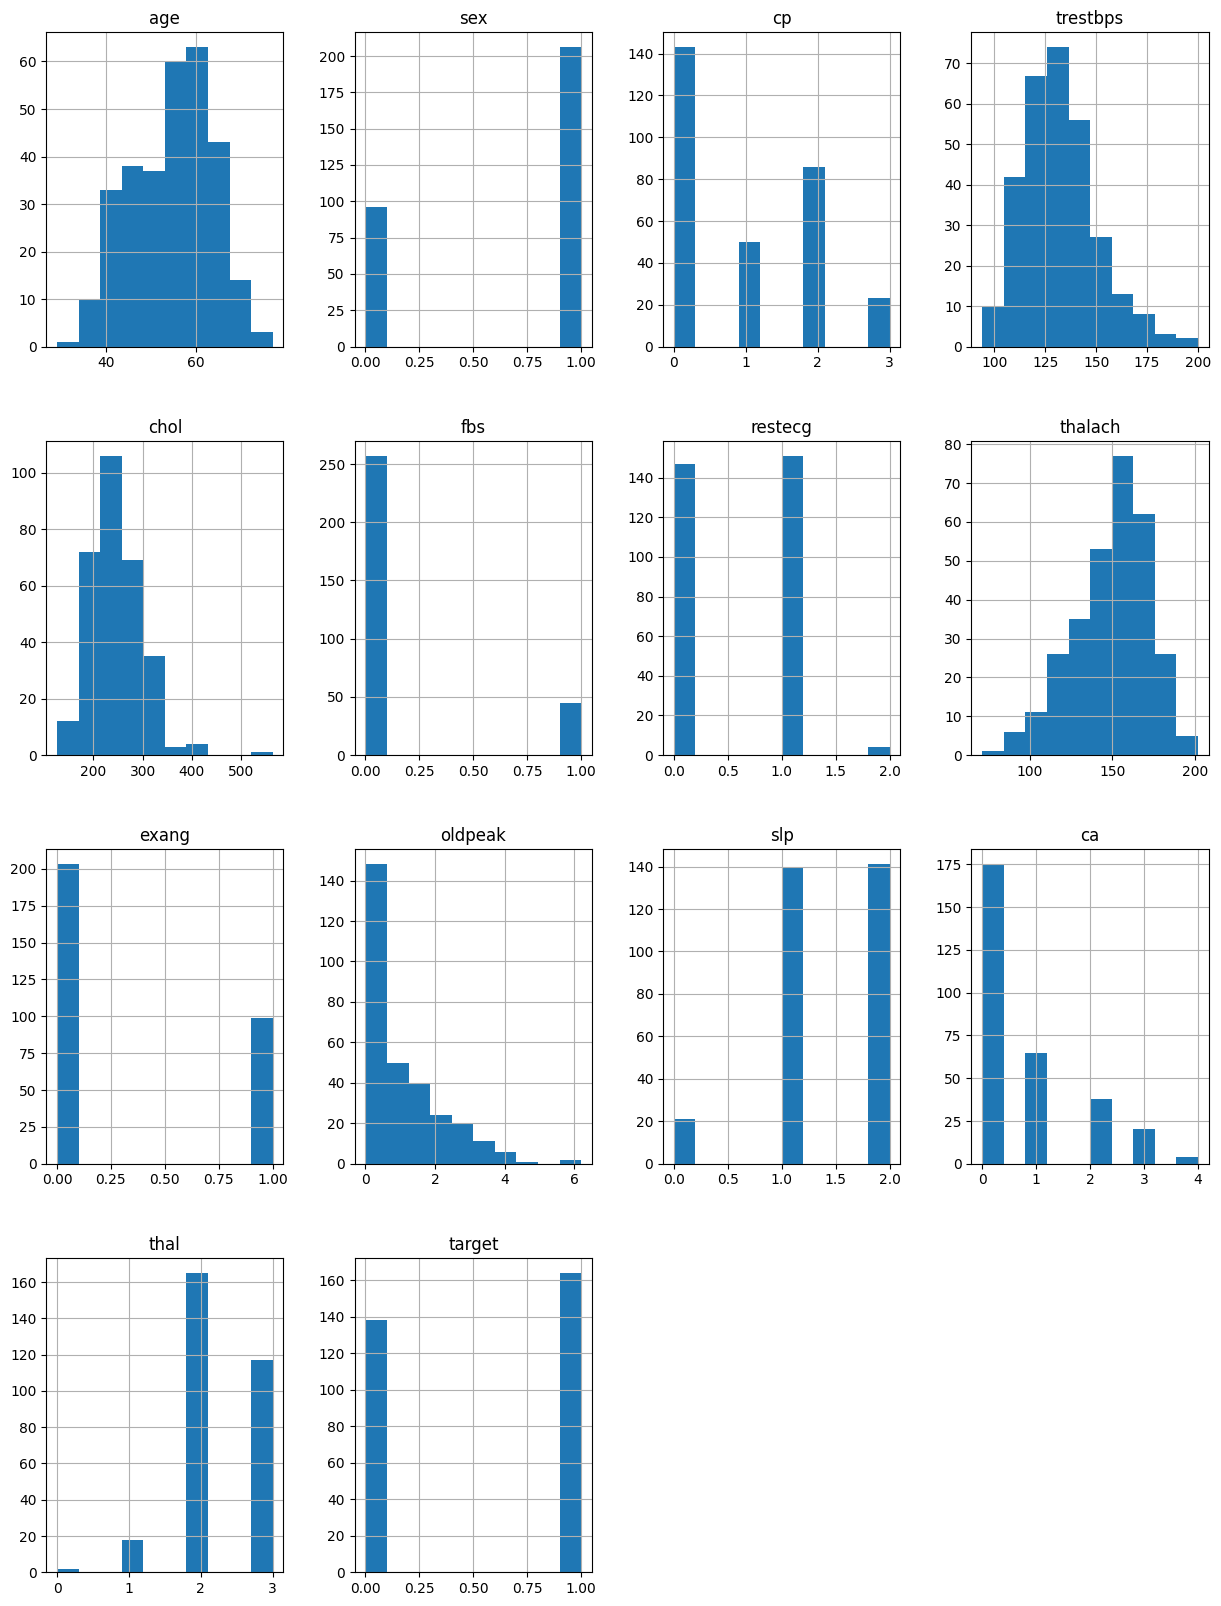

In [6]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

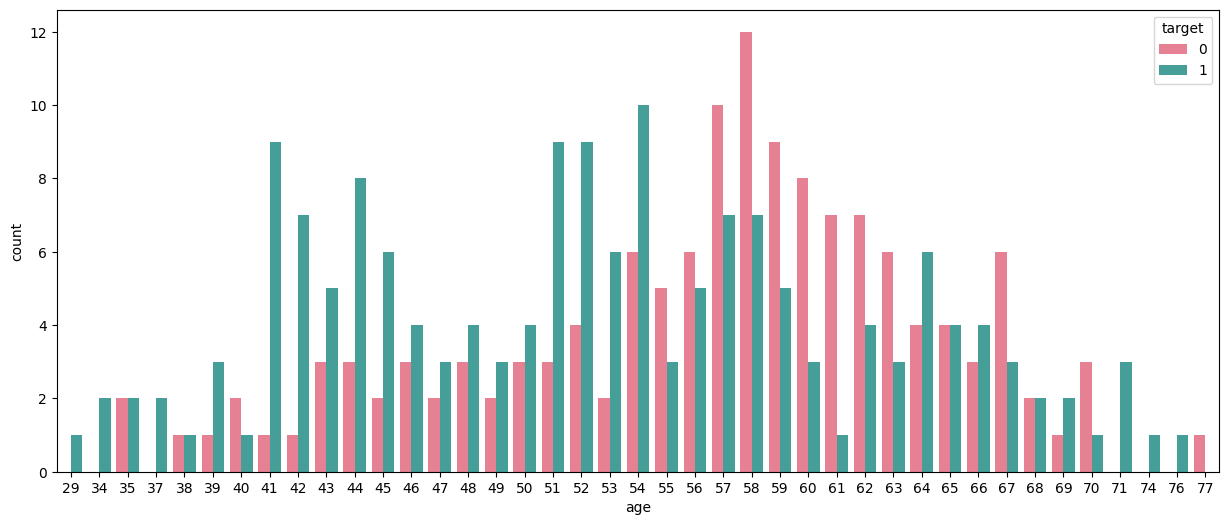

In [7]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='husl')
plt.show()

In [8]:
from operator import add
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

C:\Users\salman\AppData\Local\Temp\ipykernel_24380\2794870436.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])
C:\Users\salman\AppData\Local\Temp\ipykernel_24380\2794870436.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])
C:\Users\salman\AppData\Local\Temp\ipykernel_24380\2794870436.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])
C:\Users\salman\AppData\Local\Temp\ipykernel_24380\2794870436.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])
C:\Users\salman\AppData\Local\Temp\ipykernel_24380\2794870436.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])
C:\Us

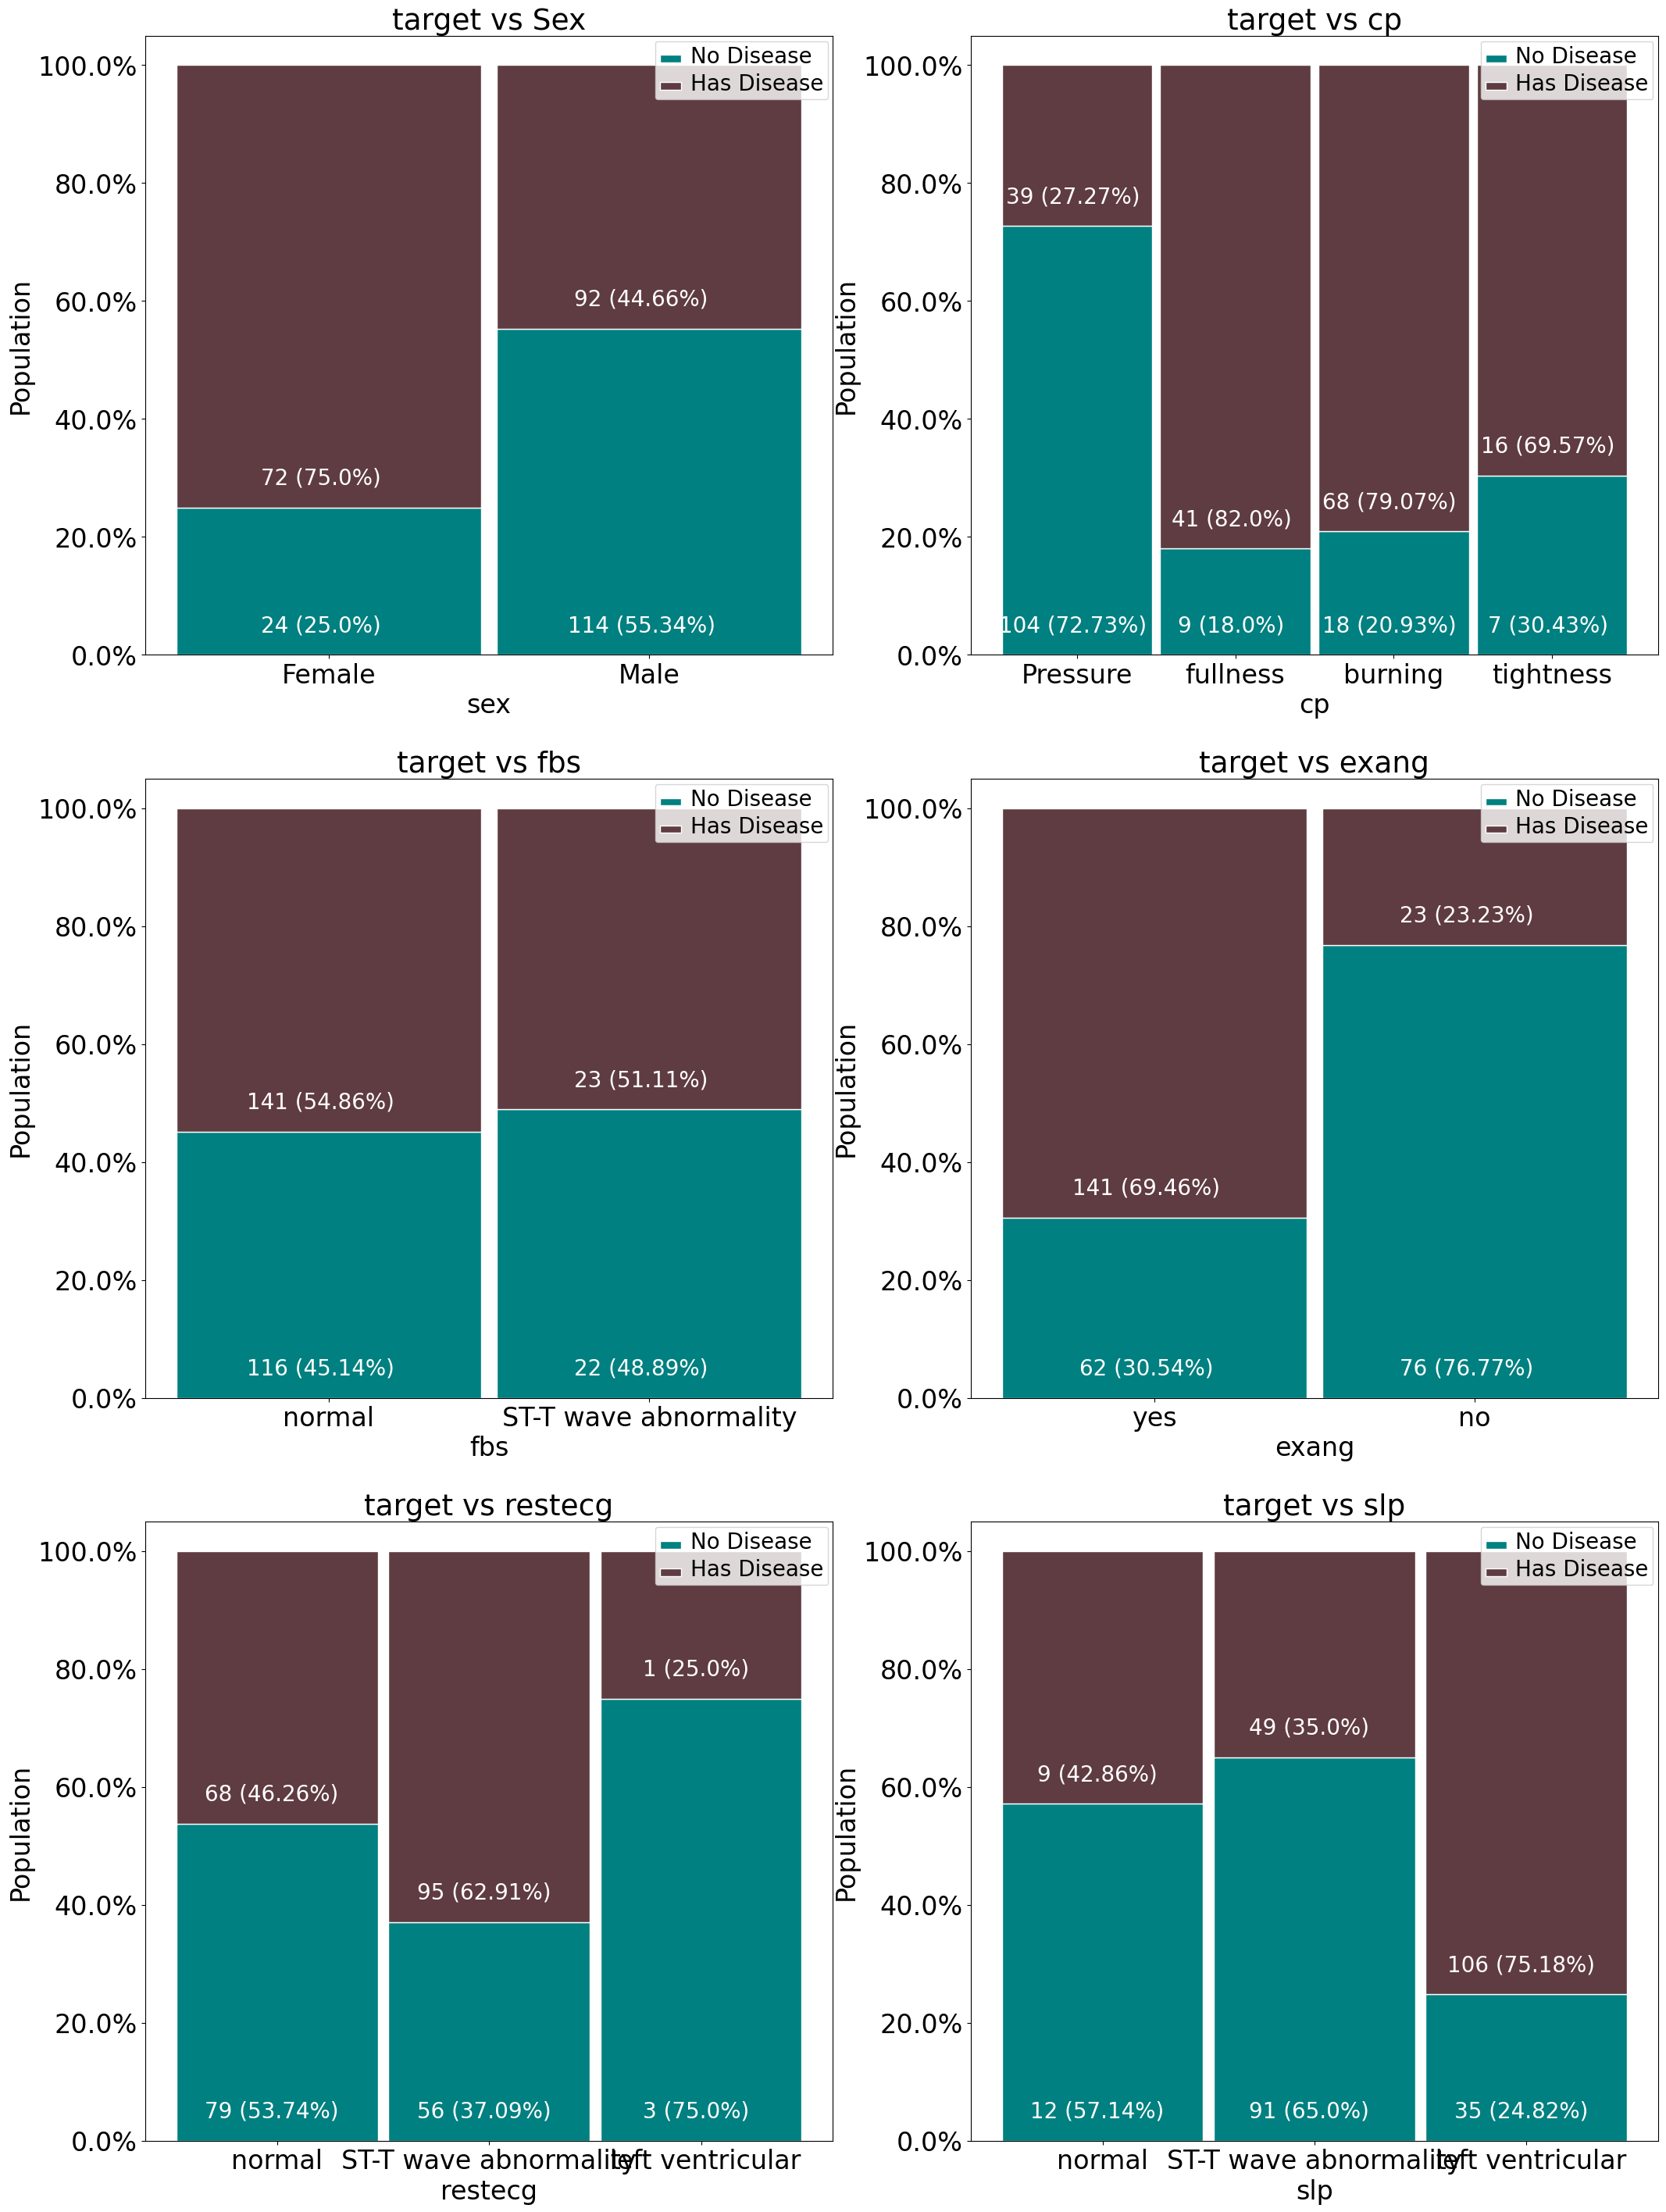

In [15]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

plt.subplot(grid_rows, grid_cols, 1)
temp = df[['sex','target']].groupby(['sex','target']).size().unstack('target')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'target vs Sex', ylabel = 'Population')

plt.subplot(grid_rows, grid_cols, 2)
temp = df[['cp','target']].groupby(['cp','target']).size().unstack('target')
temp.rename(index={0:'Pressure', 1:'fullness',2:'burning',3:'tightness'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'target vs cp', ylabel = 'Population')

plt.subplot(grid_rows, grid_cols, 3)
temp = df[['fbs','target']].groupby(['fbs','target']).size().unstack('target')
temp.rename(index={0:'normal', 1:'ST-T wave abnormality'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'target vs fbs', ylabel = 'Population')

plt.subplot(grid_rows, grid_cols, 4)
temp = df[['exang','target']].groupby(['exang','target']).size().unstack('target')
temp.rename(index={0:'yes', 1:'no'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'target vs exang', ylabel = 'Population')

plt.subplot(grid_rows, grid_cols, 5)
temp = df[['restecg','target']].groupby(['restecg','target']).size().unstack('target')
temp.rename(index={0:'normal', 1:'ST-T wave abnormality',2:' left ventricular'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'target vs restecg', ylabel = 'Population')

plt.subplot(grid_rows, grid_cols, 6)
temp = df[['slp','target']].groupby(['slp','target']).size().unstack('target')
temp.rename(index={0:'normal', 1:'ST-T wave abnormality',2:' left ventricular'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'target vs slp', ylabel = 'Population')

In [12]:
df['restecg'].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

to_scale = ['age','trestbps','chol','thalach','oldpeak']

df[to_scale] = scaler.fit_transform(df[to_scale])


In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slp,ca,thal,target
count,3.020000e+02,302.000000,302.000000,3.020000e+02,3.020000e+02,302.000000,302.000000,3.020000e+02,302.000000,3.020000e+02,302.000000,302.000000,302.000000,302.000000
mean,-2.676299e-16,0.682119,0.963576,-6.676043e-16,-1.470494e-17,0.149007,0.526490,-5.323189e-16,0.327815,-1.294035e-16,1.397351,0.718543,2.314570,0.543046
std,1.001660e+00,0.466426,1.032044,1.001660e+00,1.001660e+00,0.356686,0.526027,1.001660e+00,0.470196,1.001660e+00,0.616274,1.006748,0.613026,0.498970
min,-2.814192e+00,0.000000,0.000000,-2.144521e+00,-2.332210e+00,0.000000,0.000000,-3.436149e+00,0.000000,-8.995441e-01,0.000000,0.000000,0.000000,0.000000
25%,-7.107878e-01,0.000000,0.000000,-6.617119e-01,-6.870826e-01,0.000000,0.000000,-7.137164e-01,0.000000,-8.995441e-01,1.000000,0.000000,2.000000,0.000000
50%,1.195033e-01,1.000000,1.000000,-9.140084e-02,-1.161266e-01,0.000000,1.000000,1.281605e-01,0.000000,-2.096081e-01,1.000000,0.000000,2.000000,1.000000
75%,7.283833e-01,1.000000,2.000000,4.789102e-01,5.467629e-01,0.000000,1.000000,7.185677e-01,1.000000,4.803280e-01,2.000000,1.000000,3.000000,1.000000
max,2.499671e+00,1.000000,3.000000,3.900776e+00,6.145034e+00,1.000000,2.000000,2.292987e+00,1.000000,4.447460e+00,2.000000,4.000000,3.000000,1.000000


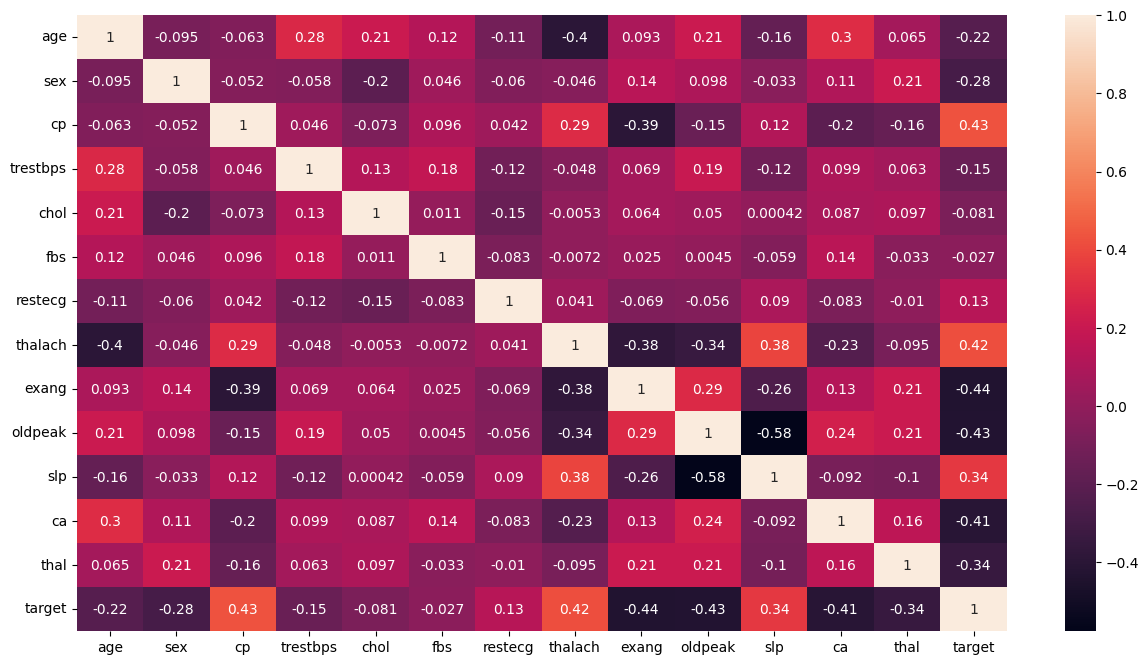

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 13), (61, 13), (241,), (61,))

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [27]:
log_reg.score(X_test, y_test)

0.7868852459016393

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = log_reg.predict(X_test)

confusion_matrix(y_test, y_pred)



array([[22, 10],
       [ 3, 26]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77        32
           1       0.72      0.90      0.80        29

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



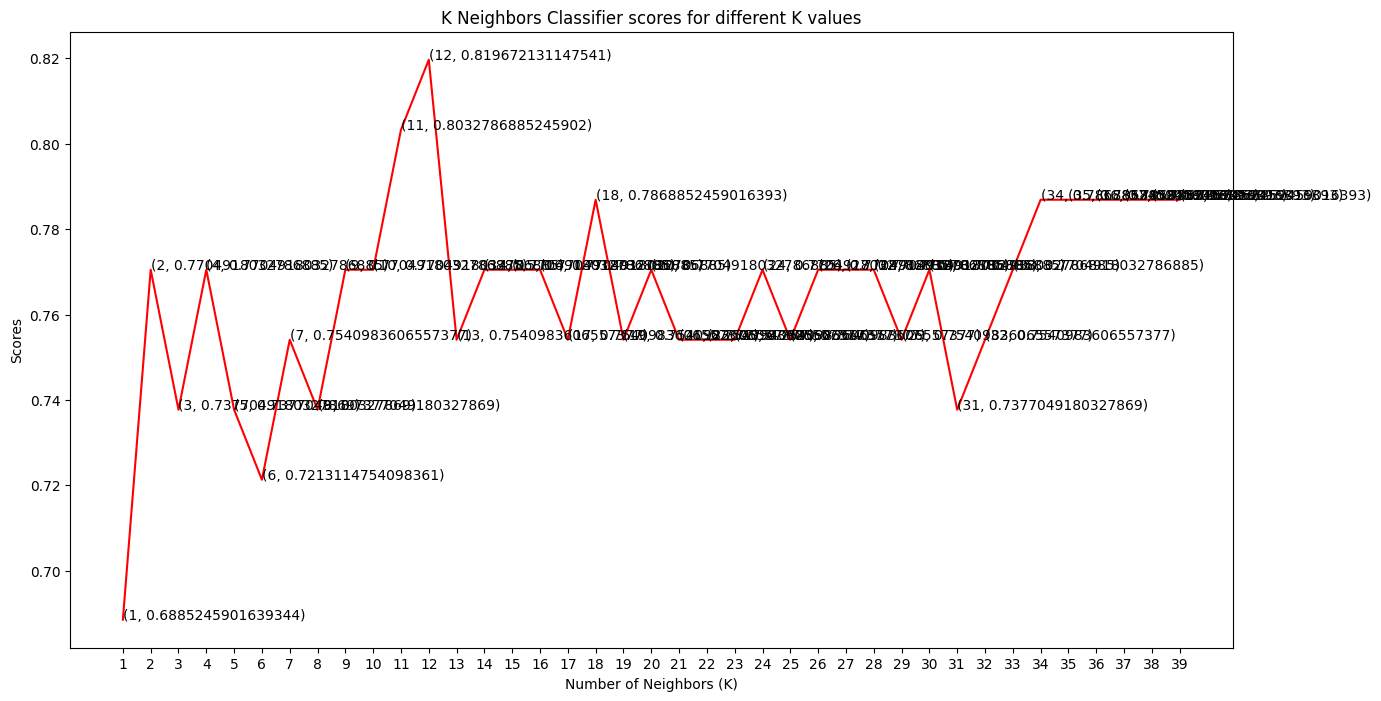

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_scores = []
for k in range(1,40):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

plt.figure(figsize=(15,8))
plt.plot([k for k in range(1,40)], knn_scores, color = 'red')
for i in range(1,40):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,40)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [34]:
np.argmax(knn_scores)

11

In [35]:
k = np.argmax(knn_scores) + 1
knn_classifier = KNeighborsClassifier(n_neighbors = k)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.819672131147541

In [38]:
# save the model to disk

import pickle

filename = '../../model/heart_disease.pkl'

pickle.dump(knn_classifier, open(filename, 'wb'))
